## <u>EJERCICIO 2</u>
### **CLASIFICACION CON Redes Convolucionales**

### PASO 0 - Importo las librerias y carga del dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

In [20]:
# Utilizaremos solo imagenes de 7 personas con mas de 70 imagenes disponibles.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1, color=False, download_if_missing=True)

# Inspeccion de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin divir en subconjuntos
X = lfw_people.images

# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)

Total dataset size:
h, w: (125, 94)
n_samples: 1288
n_classes: 7


In [21]:
print(target_names)
print(X.shape)
print(y.shape)
print(y[0])
print(X[0])

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 125, 94)
(1288,)
5
[[0.99607843 0.99607843 0.9986928  ... 0.21699347 0.20261438 0.20653595]
 [0.99607843 0.9973857  0.99607843 ... 0.22222222 0.20261438 0.20653595]
 [0.9986928  0.9973857  0.99346405 ... 0.2248366  0.20522876 0.20522876]
 ...
 [0.3150327  0.29542485 0.2535948  ... 0.39346406 0.37908497 0.37124184]
 [0.29934642 0.2875817  0.2535948  ... 0.38562092 0.38300657 0.38300657]
 [0.27973858 0.27320263 0.25751635 ... 0.38431373 0.38039216 0.38039216]]


In [22]:
#Funciones para graficar
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

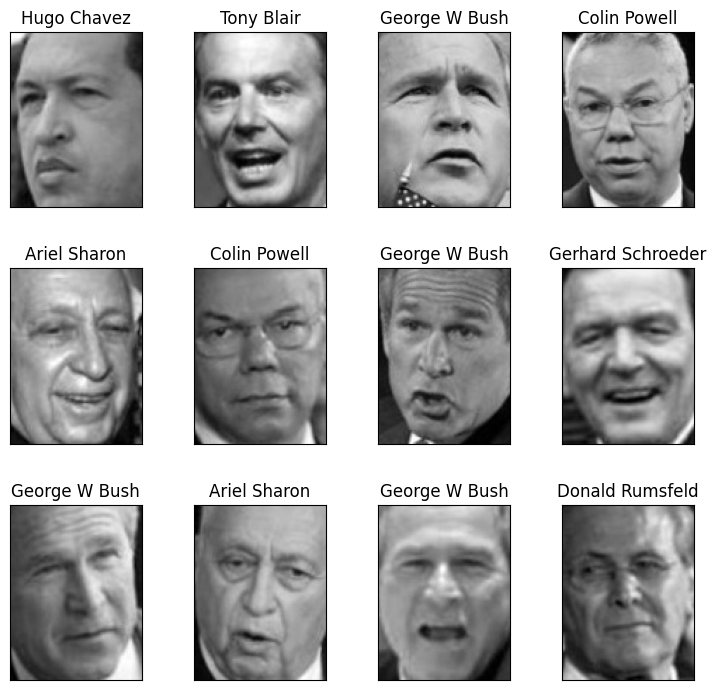

In [23]:
titles = [title(y[i], target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

In [24]:
print(np.max(X))
print(np.min(X))

1.0
0.0


### PASO 1 - Divido las data en entrenamiento y test

In [25]:
# Division de los datos normalizados

porc_test = 0.25
seed = 8 #8

x_entrenar, x_test, y_entrenar, y_test = train_test_split(X, y, test_size=porc_test, random_state=seed, shuffle=True)
x_testeo = x_test.copy()
print(f"Entrenamiento: {x_entrenar.shape}")
print(f"Testeo: {x_test.shape}")

Entrenamiento: (966, 125, 94)
Testeo: (322, 125, 94)


### PASO 2 - Parametros para entrenamiento y  preparacion de los datos

In [26]:
# Estipulo los parametros para el entrenamiento de la red
lr = 0.1
epochs = 200
batch_size = 128
np.random.seed(9)

# Preparacion de la data - Salida transformada a one-hot
y_entrenar = to_categorical(y_entrenar, n_classes)
y_test = to_categorical(y_test, n_classes)

In [27]:
row, alt, ancho = x_entrenar.shape
x_entrenar = x_entrenar.reshape(row, alt, ancho, 1)
row, alt, ancho = x_test.shape
x_test = x_test.reshape(row, alt, ancho, 1)

print(x_entrenar.shape)
print(x_test.shape)

(966, 125, 94, 1)
(322, 125, 94, 1)


### PASO 3 - Creacion del modelo

In [28]:
# Estructura de la red
input_layer = Input(shape=x_entrenar.shape[1:])
conv_1 = Conv2D(32, (3, 3), activation="relu") (input_layer)
conv_2 = Conv2D(64, (3, 3), activation="relu") (conv_1)
conv_3 = Conv2D(128, (3, 3), activation="relu") (conv_2)
pool_1 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
dropout_1 = Dropout(0.3) (pool_1)
flatten_1 = Flatten() (dropout_1)
dense_1 = Dense(50, activation="relu") (flatten_1)
dense_2 = Dense(30, activation="relu") (dense_1)
dropout_2 = Dropout(0.5) (dense_2)
output_layer = Dense(n_classes, activation="softmax") (dropout_2)

# Instancia del modelo
modelo = Model(input_layer, output_layer)

In [29]:
optimizador = Adadelta(learning_rate=lr, rho=0.95)
modelo.compile(optimizer=optimizador, loss="categorical_crossentropy", metrics=["acc", "mse"])
modelo.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 125, 94, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 123, 92, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 121, 90, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 119, 88, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 59, 44, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 59, 44, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 332288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │      16,614,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             217 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,708,869 (63.74 MB)

 Trainable params: 16,708,869 (63.74 MB)

 Non-trainable params: 0 (0.00 B)

### PASO 4 - Entrenamiento del modelo

In [30]:
inicio = time.time()
historia = modelo.fit(x_entrenar, y_entrenar, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
final = time.time()
print('\nTiempo que demoro el entrenamiento: {:.3f} segundos'.format(final-inicio))

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 709ms/step - acc: 0.2629 - loss: 1.8873 - mse: 0.1191 - val_acc: 0.4441 - val_loss: 1.7645 - val_mse: 0.1137
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - acc: 0.3461 - loss: 1.8220 - mse: 0.1159 - val_acc: 0.4441 - val_loss: 1.7505 - val_mse: 0.1128
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - acc: 0.3506 - loss: 1.7855 - mse: 0.1141 - val_acc: 0.4441 - val_loss: 1.7960 - val_mse: 0.1155
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - acc: 0.3542 - loss: 1.8065 - mse: 0.1153 - val_acc: 0.4441 - val_loss: 1.6522 - val_mse: 0.1060
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - acc: 0.3510 - loss: 1.7974 - mse: 0.1145 - val_acc: 0.4441 - val_loss: 1.6443 - val_mse: 0.1052
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - acc: 0.3625 - loss: 1.7810 - mse: 0.1135 - val_acc: 0.4441 - val_loss: 1.6598 - val_mse: 0.1070
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - acc: 0.3568 - loss: 1.7927 - mse: 0.1144 - val_acc: 0

### PASO 5 - Evaluacion del entrenamiento del modelo

In [31]:
historia.history.keys()

dict_keys(['acc', 'loss', 'mse', 'val_acc', 'val_loss', 'val_mse'])

In [32]:
def grafico_comprobacion(train, test, minimo, maximo, ylabel):

    plt.plot(historia.history[train], linewidth=1, label="Entrenamiento")
    plt.plot(historia.history[test], linewidth=1, label="Testeo")
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.axis([0, epochs, minimo, maximo])
    plt.legend(loc="best")

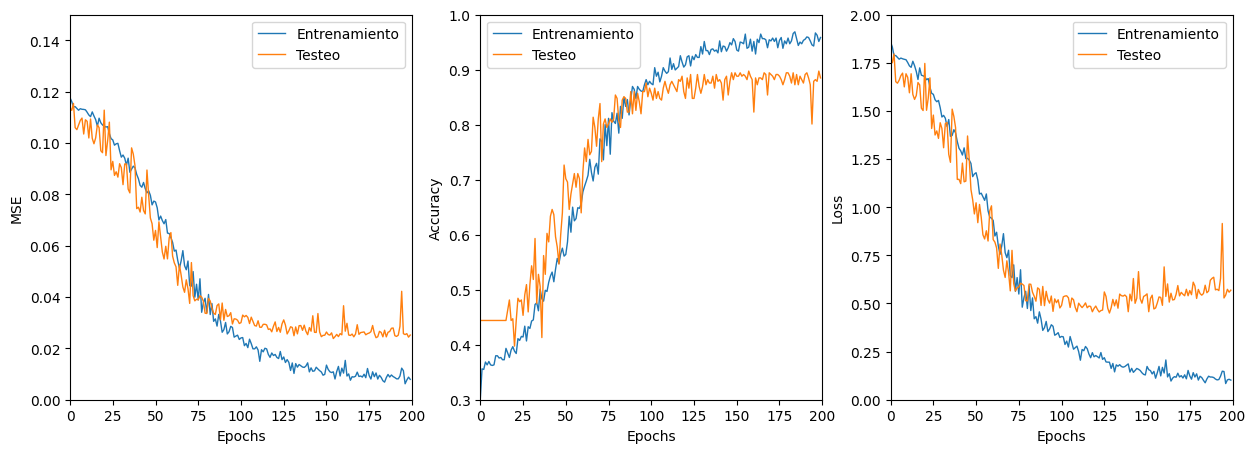

In [33]:
f = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
grafico_comprobacion("mse", "val_mse", 0, 0.15, "MSE")

plt.subplot(1,3,2)
grafico_comprobacion("acc", "val_acc", 0.3, 1, "Accuracy")

plt.subplot(1,3,3)
grafico_comprobacion("loss", "val_loss", 0, 2, "Loss")

plt.show()

In [34]:
acc_test = modelo.evaluate(x_test, y_test,verbose=0)
acc_entrenamiento = modelo.evaluate(x_entrenar, y_entrenar,verbose=0)

print(f"Accuracy sobre conjunto de entrenamiento: {acc_entrenamiento[1]}")
print(f"Accuracy sobre conjunto de validacion:{acc_test[1]}")

Accuracy sobre conjunto de entrenamiento: 1.0
Accuracy sobre conjunto de validacion:0.8850931525230408


### PASO 6 - Predicciones y evaluacion con Matriz de Confusion

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Matriz de confusion
[[ 15   2   0   1   1   0   0]
 [  0  52   1   2   0   1   0]
 [  1   2  18   5   2   0   0]
 [  1   3   2 136   1   0   0]
 [  0   0   1   3  20   1   0]
 [  0   1   0   0   0  14   1]
 [  0   0   0   3   2   0  30]]


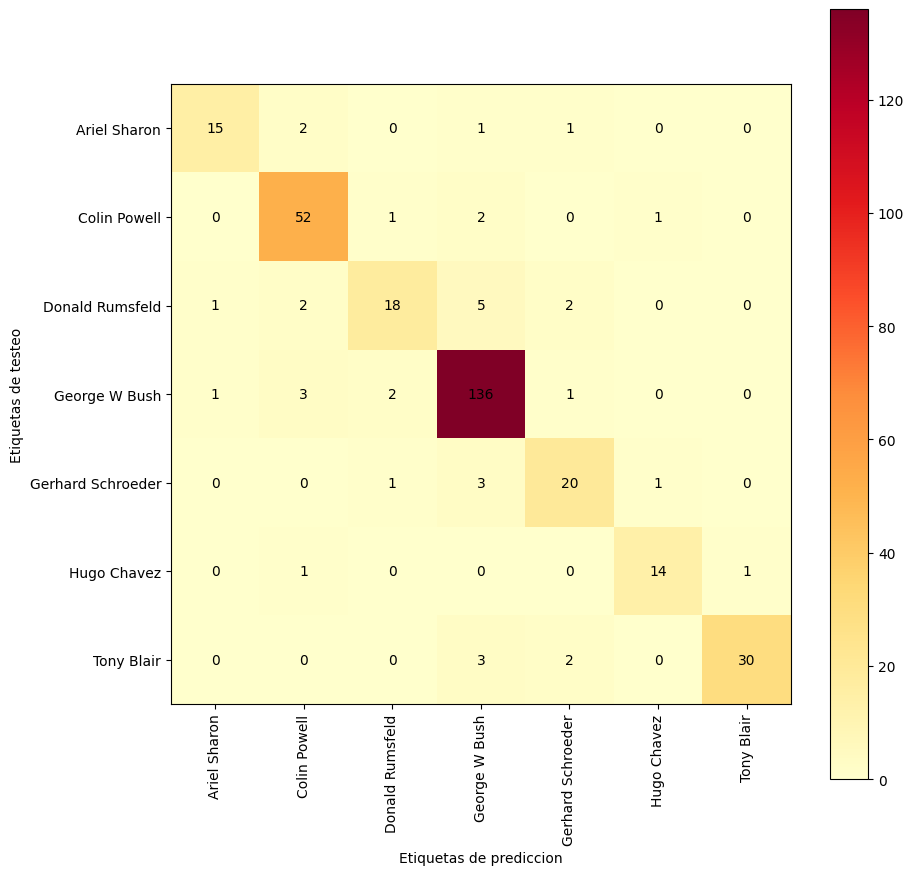

In [35]:
# Predicciones con la data de testeo
y_prediccion = modelo.predict(x_test, verbose=1)

# Matriz de confusion y grafica
y_test_cm = np.argmax(y_test, axis=1)
y_prediccion_cm = np.argmax(y_prediccion, axis=1)
confm = confusion_matrix(y_test_cm, y_prediccion_cm)
print(f"\nMatriz de confusion")
print(confm)

f = plt.figure(figsize=(10,10))
plt.imshow(confm, cmap="YlOrRd")
plt.xlabel("Etiquetas de prediccion")
plt.ylabel("Etiquetas de testeo")
plt.xticks(np.arange(7), target_names,rotation=90)
plt.yticks(np.arange(7), target_names,rotation=0)
for i in range(len(target_names)):
    for j in range(len(target_names)):
        text = plt.text(j, i, confm[i, j], ha="center", va="center", color="black")
plt.colorbar()
plt.show()


### PASO 7 - Otra verificacion



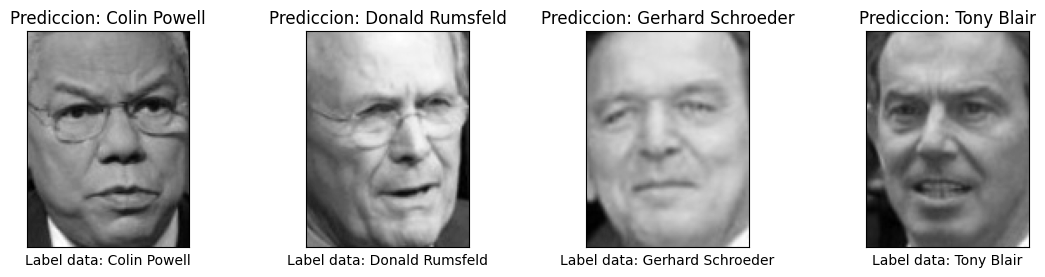

In [36]:
num = [36, 63, 83, 101]

plt.figure(figsize=(1.8 * 4, 2.4 * 1))
plt.subplots_adjust(bottom=0, left=0.01, right=1.5, top=0.90, hspace=0.35)
for i, j in enumerate(num):
    plt.subplot(1, 4, i + 1)
    plt.imshow(x_testeo[j], cmap=plt.cm.gray)
    plt.title(f"Prediccion: {target_names[y_prediccion_cm[j]]}", size=12)
    plt.xlabel(f"Label data: {target_names[y_test_cm[j]]}")
    plt.xticks(())
    plt.yticks(())

### PASO 8 - Conclusiones
Tras experimentar con diversas configuraciones, incluyendo el número de capas, la cantidad de neuronas en cada una y diferentes hiperparámetros, logré diseñar una estructura de modelo que supera los requisitos de precisión especificados en el ejercicio.

En esta arquitectura, dado que los datos de entrada están representados como un vector de dos dimensiones que pasan por tres capas convolucionales, la cantidad de parámetros entrenables es significativamente menor en comparación con el modelo utilizado en el ejercicio 1.

Al analizar los gráficos de MSE, Loss y Accuracy, se observan patrones zigzagueantes. Este ruido fue reducido significativamente ajustando el valor del learning rate y el tamaño del batch. Cabe destacar que este fenómeno se presenta con mayor intensidad en comparación con el modelo de redes densas.

Finalmente, la matriz de confusión muestra que el modelo es notablemente más eficiente que el de redes densas, evidenciándose en una menor cantidad de errores de clasificación fuera de la diagonal principal.